In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from statistics import mean

In [0]:
dataset1 = pd.read_csv('./Aula3-dataset_1.csv')
dataset2 = pd.read_csv('./Aula3-dataset_2.csv')

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

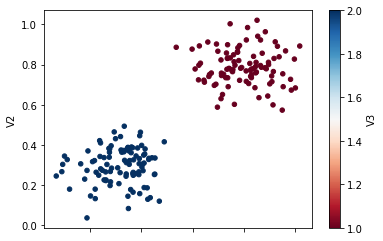

In [254]:
dataset1.plot('V1', 'V2', kind='scatter', c='V3', colormap='RdBu')

In [4]:
dataset1.head()

,V1,V2,V3
0,0.809127,0.716259,1
1,0.776365,0.883559,1
2,0.822945,0.805660,1
3,0.733771,0.776620,1
4,0.759481,0.848511,1


In [0]:
X1 = dataset1.iloc[:, :-1].values

In [0]:
def predict(row, weights):
    return sum(row * weights)

In [0]:
def sigmoid(result):
    return 1 / (1 + math.exp(-result))

In [0]:
def calculate_distance(points):
  distance = 0

  for point in points:
    for other in points:
      if other is not point:
        distance += np.linalg.norm(point-other)

  return distance

In [0]:
def perceptron(X, learning_rate=0.01):
    not_increase_count = 0
    X = np.append(X, np.ones(X.shape[0]).reshape(X.shape[0], -1), axis=1)
    weights = np.random.uniform(-1, 1, X.shape[1])
    distances = []
    window_size = 10
    
    distance = 1
    while True:
        outputs = np.array([])
        distance = 0.0
        
        data = X[np.random.choice(X.shape[0], X.shape[0], replace=False)]
        for i in range(X.shape[0]):
            result = predict(X[i], weights)
            prediction = sigmoid(result)
            output = 2 if prediction >= 0.5 else 1
            outputs = np.append(outputs, output)
            for j in range(X.shape[1]):
              X_mean = 0
              Y_mean = 0
              if i > window_size:
                X_mean = mean(X[i-window_size:i, j].tolist())
                Y_mean = mean(outputs[i-window_size: i])

              weights[j] = weights[j] + (learning_rate * (X[i, j] - X_mean) * (prediction-Y_mean))
        
        distance = calculate_distance(X[outputs == 2])
        distance += calculate_distance(X[outputs == 1])
        distances.append(distance)

        if len(distances) > 1 and distance >= distances[-2]:
          not_increase_count += 1
        else:
          not_increase_count = 0

        print(not_increase_count)
        if not_increase_count == 5:
          break

    return weights, distances

In [670]:
weights, distances = perceptron(X1, learning_rate=1e-3)
print(weights)

0
1
2
3
0
0
0
0
0
0
0
1
2
3
4
5
[ 0.29447342 -0.06147953 -0.05466973]


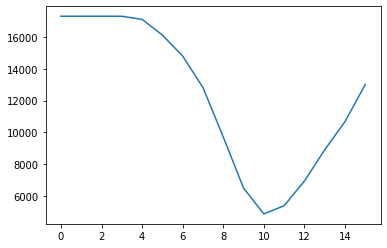

In [671]:
plt.plot(distances)

In [0]:
X2 = dataset2.iloc[:, :-1].values

0
0
0
0
0
0
1
0
1
2
3
4
5


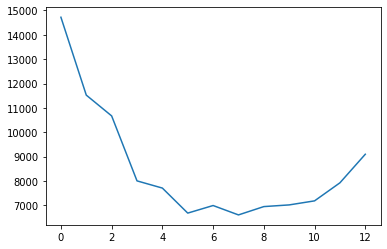

In [682]:
weights, distances = perceptron(X2, learning_rate=1e-3)
plt.plot(distances)